In [1]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Oct 26 14:50:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [4]:
%cd '/content/gdrive/My Drive/LDS8_K279_ONLINE_VienTriThienAnh/LDS8_K279_VienTriThienAnh_Cuoi_ky/'

/content/gdrive/My Drive/LDS8_K279_ONLINE_VienTriThienAnh/LDS8_K279_VienTriThienAnh_Cuoi_ky


In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

### Overview of the dataset

In [6]:
df = pd.read_csv('Dataset/MELBOURNE_HOUSE_PRICES_LESS.csv')

In [7]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [9]:
df.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


### Preprocessing

In [10]:
data = df.copy()

In [11]:
data = data.dropna()

In [12]:
X = data.drop(columns=['Price'], axis = 1)
y = data[['Price']]

#### Encoding categorical data

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection, preprocessing

In [14]:
for c in X.columns:
    if X[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(X[c].values)) 
        X[c] = lbl.transform(list(X[c].values))

#### Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

#### Splitting the dataset into training and testing set

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Building the ANN

In [17]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_dim= X_train.shape[1], kernel_initializer='normal'),
    layers.Dropout(0.25),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='linear')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               6656      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               1

In [19]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mse','mae'])

In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [21]:
callbacks = [EarlyStopping(monitor='val_loss', patience=10),
             ModelCheckpoint('model_checkpoint_price_25102022.h5',
                             save_best_only=True)]

In [22]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size= 32,
    epochs= 100,
    callbacks=callbacks,
)

Epoch 1/100
1211/1211 [==============================] - 9s 5ms/step - loss: 301621772288.0000 - mse: 301621772288.0000 - mae: 367893.5312 - val_loss: 159333007360.0000 - val_mse: 159333007360.0000 - val_mae: 247536.8906
Epoch 2/100
1211/1211 [==============================] - 5s 4ms/step - loss: 221892411392.0000 - mse: 221892411392.0000 - mae: 310281.3750 - val_loss: 152596594688.0000 - val_mse: 152596594688.0000 - val_mae: 231824.2969
Epoch 3/100
1211/1211 [==============================] - 5s 4ms/step - loss: 211800637440.0000 - mse: 211800637440.0000 - mae: 302038.2500 - val_loss: 127187525632.0000 - val_mse: 127187525632.0000 - val_mae: 211556.0781
Epoch 4/100
1211/1211 [==============================] - 5s 4ms/step - loss: 207135866880.0000 - mse: 207135866880.0000 - mae: 296565.0938 - val_loss: 141640220672.0000 - val_mse: 141640220672.0000 - val_mae: 226677.5000
Epoch 5/100
1211/1211 [==============================] - 5s 4ms/step - loss: 205897138176.0000 - mse: 205897138176.0

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


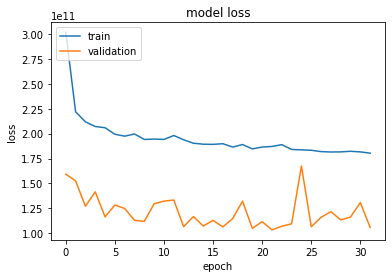

In [23]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [24]:
from tensorflow.keras.models import load_model

In [25]:
model = load_model('model_checkpoint_price_25102022.h5')

In [26]:
scores = model.evaluate(X_train, y_train)
print(scores)

1211/1211 [==============================] - 3s 2ms/step - loss: 103211261952.0000 - mse: 103211261952.0000 - mae: 200059.5469
[103211261952.0, 103211261952.0, 200059.546875]


In [27]:
y_test = y_test.values

In [28]:
y_pred = model.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

303/303 [==============================] - 1s 2ms/step
[[ 706439.    688000.  ]
 [ 663466.25  455000.  ]
 [ 877454.69  723000.  ]
 ...
 [1271247.    855000.  ]
 [ 632723.25  691000.  ]
 [ 893552.81  987000.  ]]


In [29]:
y_pred[:10]

array([[ 706439.  ],
       [ 663466.25],
       [ 877454.7 ],
       [ 768266.56],
       [ 980651.75],
       [ 627430.25],
       [1035350.3 ],
       [ 720789.75],
       [ 733968.06],
       [ 726677.5 ]], dtype=float32)

In [30]:
y_test[:10]

array([[ 688000.],
       [ 455000.],
       [ 723000.],
       [ 880000.],
       [ 930000.],
       [ 396000.],
       [1395000.],
       [ 810000.],
       [ 715000.],
       [ 772000.]])

### Make new predictions for samples that have no prices in the dataset.

In [31]:
test_df = df[df.isna().any(axis=1)]
test_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
8,Albanvale,1 Jackson Cct,6,h,NaN,PI,hockingstuart,1/04/2017,3021,Western Metropolitan,1899,14.0,Brimbank City Council
15,Altona Meadows,57 Tatman Dr,4,h,NaN,SN,Barry,1/04/2017,3028,Western Metropolitan,7630,15.5,Hobsons Bay City Council
24,Ashburton,1 Pitt St,4,h,NaN,S,Jellis,1/04/2017,3147,Southern Metropolitan,3052,10.2,Boroondara City Council
29,Attwood,46 Threadneedle St,4,h,NaN,SN,Barry,1/04/2017,3049,Northern Metropolitan,1130,16.5,Hume City Council
38,Balwyn North,12 Agnes Av,3,h,NaN,SP,Fletchers,1/04/2017,3104,Southern Metropolitan,7809,9.7,Boroondara City Council


In [32]:
test_X = test_df.drop(columns=["Price"])
test_X.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
8,Albanvale,1 Jackson Cct,6,h,PI,hockingstuart,1/04/2017,3021,Western Metropolitan,1899,14.0,Brimbank City Council
15,Altona Meadows,57 Tatman Dr,4,h,SN,Barry,1/04/2017,3028,Western Metropolitan,7630,15.5,Hobsons Bay City Council
24,Ashburton,1 Pitt St,4,h,S,Jellis,1/04/2017,3147,Southern Metropolitan,3052,10.2,Boroondara City Council
29,Attwood,46 Threadneedle St,4,h,SN,Barry,1/04/2017,3049,Northern Metropolitan,1130,16.5,Hume City Council
38,Balwyn North,12 Agnes Av,3,h,SP,Fletchers,1/04/2017,3104,Southern Metropolitan,7809,9.7,Boroondara City Council


In [33]:
for c in test_X.columns:
    if test_X[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(test_X[c].values)) 
        test_X[c] = lbl.transform(list(test_X[c].values))

In [34]:
sc = StandardScaler()
sc.fit(test_X)
test_X = sc.transform(test_X)

In [35]:
test_y_predictions = model.predict(test_X)

456/456 [==============================] - 1s 2ms/step


In [36]:
test_y_predictions[:10]

array([[ 953095.25],
       [ 703885.8 ],
       [1978785.6 ],
       [ 704927.44],
       [1362723.9 ],
       [1672355.4 ],
       [ 849749.5 ],
       [ 945653.7 ],
       [ 523012.3 ],
       [1132849.9 ]], dtype=float32)